### Definition of Logistic  Regression

Logistic regression is used to predict the probability of an event taking place. Is is used segmoid function. to return the probability. 
### Type's of Logistic  Regression

- Binary classification
- Multiclass classification
- Multilabel classification
- Probabilistic classification
- One vs. rest
- One vs. one

### Assumption of logistic regression

- Assumption of logistic regression is that the data is linearly separable.
- 1. the dependent variable is binary
- 2. the independent variable is continuous
- 3. the dependent variable is either 0 or 1

In [86]:
# import liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder


In [59]:
# load the data set
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Preprocess the data

<Axes: >

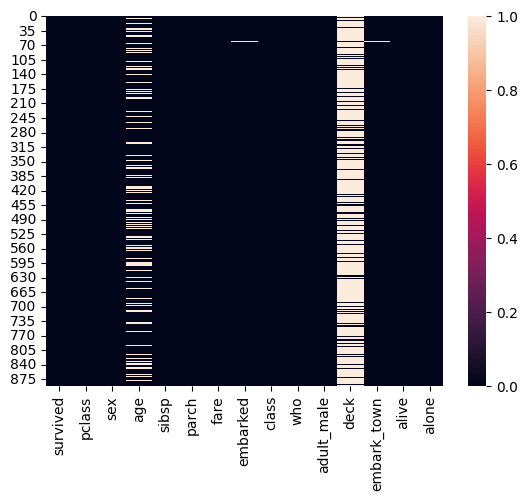

In [60]:
# Shows the null values using heatmap
sns.heatmap(df.isnull())

- aove graph shows that the deck columns have null values more then 70% so we can drop this column
- age, embark_town and embarked columns have null values
- we handle these values

In [61]:
# check the null values in data set in percentage
df.isnull().mean()*100


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

- above shows that the deck columns have null values more then 70% so we can drop this column
- usually if any column has null values more then 70% then we can drop that column

In [62]:
# drop the deck column
df.drop('deck', axis=1, inplace=True)

- inpute missing value in age and fair


In [63]:
#- inpute missing value in age and fair
# Impute missing values in 'age' and 'fare' columns
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)


C:\Users\Yahya\AppData\Local\Temp\ipykernel_18992\2032476947.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Yahya\AppData\Local\Temp\ipykernel_18992\2032476947.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [64]:
# empute missing value in embarked and embarkeddown column
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


C:\Users\Yahya\AppData\Local\Temp\ipykernel_18992\3023074063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
C:\Users\Yahya\AppData\Local\Temp\ipykernel_18992\3023074063.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [65]:
# shows the missing value , we handle all mising values
df.isnull().mean()*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

### Shows the null values using heatmap

<Axes: >

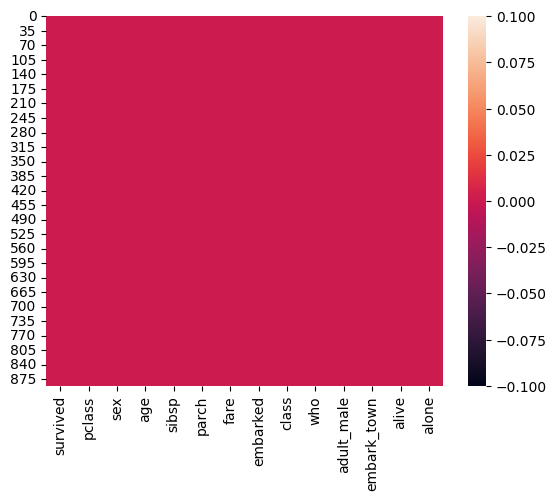

In [66]:
# Shows the null values using heatmap
sns.heatmap(df.isnull())

Encoded the categorical variable using for loop

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [68]:
# Encode categorical columns using for lope where we use label encoder, as the object and categorical data types is given
le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object' or df[col].dtypes == 'category':
        df[col] = le.fit_transform(df[col])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    int32  
 12  alive        891 non-null    int32  
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int32(6), int64(4)
memory usage: 64.5 KB


In [70]:
df.head()
# carefully look this that there is no any categorical values in any column, all are numerical 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    int32  
 12  alive        891 non-null    int32  
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int32(6), int64(4)
memory usage: 64.5 KB


In [72]:
# X and y columns
X = df.drop('survived', axis=1)
y = df['survived']
# all values are soted in X except the 'survived' column
# the 'survived' column is the y
# becauese we want to predict 'survived' on the basis of all other columns.


In [73]:
X.info()
# These shows that all values are stored n X variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       891 non-null    int64  
 1   sex          891 non-null    int32  
 2   age          891 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embarked     891 non-null    int32  
 7   class        891 non-null    int32  
 8   who          891 non-null    int32  
 9   adult_male   891 non-null    bool   
 10  embark_town  891 non-null    int32  
 11  alive        891 non-null    int32  
 12  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int32(6), int64(3)
memory usage: 57.6 KB


In [74]:
y.info()
# These shows that Survived column values are stored n y variable

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [75]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [76]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# model call
model = LogisticRegression()


In [78]:
# Train the model 
model.fit(X_train, y_train)

c:\Users\Yahya\.conda\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
# predict the value
y_pred = model.predict(X_test)


In [87]:
# Evaluate the model 
print("The accuracy of the model is: ", accuracy_score(y_test, y_pred))
print("The precision of the model is: ", precision_score(y_test, y_pred))
print("The recall of the model is: ", recall_score(y_test, y_pred))
print("The f1-score of the model is: ", f1_score(y_test, y_pred))
print("The confusion matrix of the model is: \n", confusion_matrix(y_test, y_pred))
print("The classification report of the model is: \n", classification_report(y_test, y_pred))



The accuracy of the model is:  1.0
The precision of the model is:  1.0
The recall of the model is:  1.0
The f1-score of the model is:  1.0
The confusion matrix of the model is: 
 [[105   0]
 [  0  74]]
The classification report of the model is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual Label')

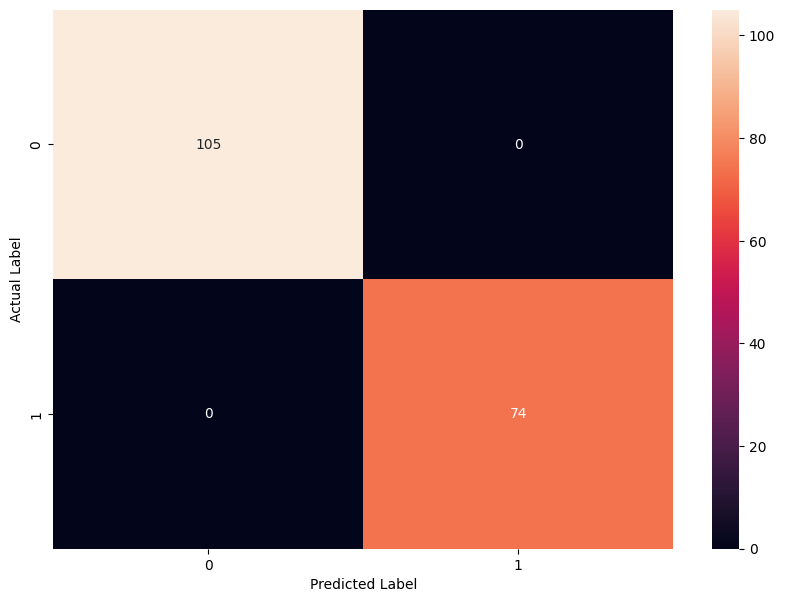

In [94]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
# predicted label and actual label
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')


In [95]:
# save the model
import pickle
pickle.dump(model, open('./saved_model/Logistic_regression.pkl', 'wb'))